# 📊 Netflix Dataset Analysis



In [29]:
import pandas as pd
import matplotlib.pyplot as plt




## 📥 Load and Inspect Dataset
Let's read the dataset and inspect the first few rows.


In [30]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🧹 Data Cleaning
We will drop rows with missing values in important columns like `type`, `release_year`, `country`, `rating`, and `duration`.



In [31]:
df = df.dropna(subset=['type', 'release_year', 'country', 'rating', 'duration'])


## 📺 Movies vs TV Shows
We will now visualize the count of Movies and TV Shows available on Netflix.


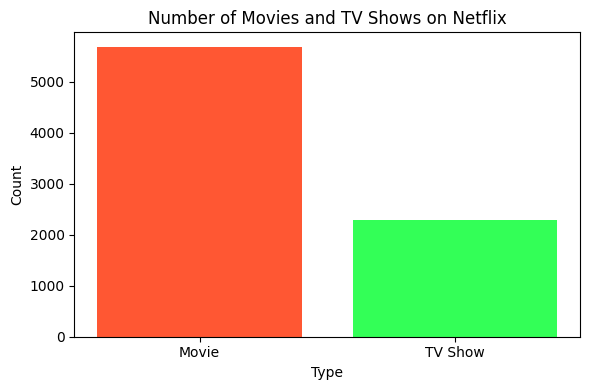

In [32]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['#FF5733', '#33FF57'])
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


## ⭐ Distribution of Ratings
Next, let's create a pie chart showing the percentage distribution of content ratings on Netflix.


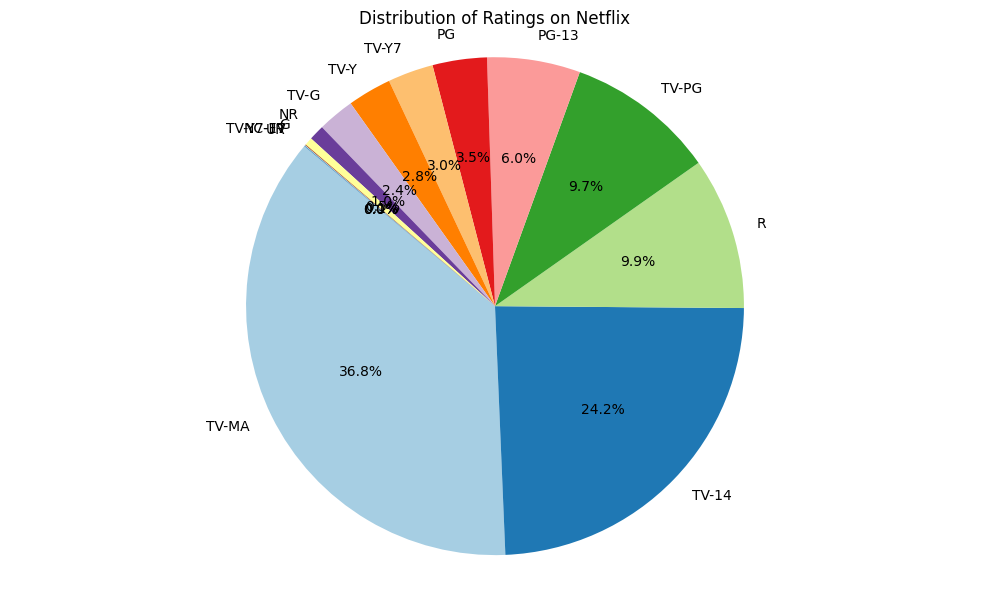

In [33]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings on Netflix')
plt.axis('equal')
plt.tight_layout()
plt.savefig('ratings_distribution.png')
plt.show()


## 🎬 Distribution of Movie Durations

The histogram below shows the distribution of movie durations on Netflix. Most movies have a duration between 80 and 120 minutes, with a few outliers that are significantly longer or shorter. This visualization helps us understand the typical length of movies available on the platform.


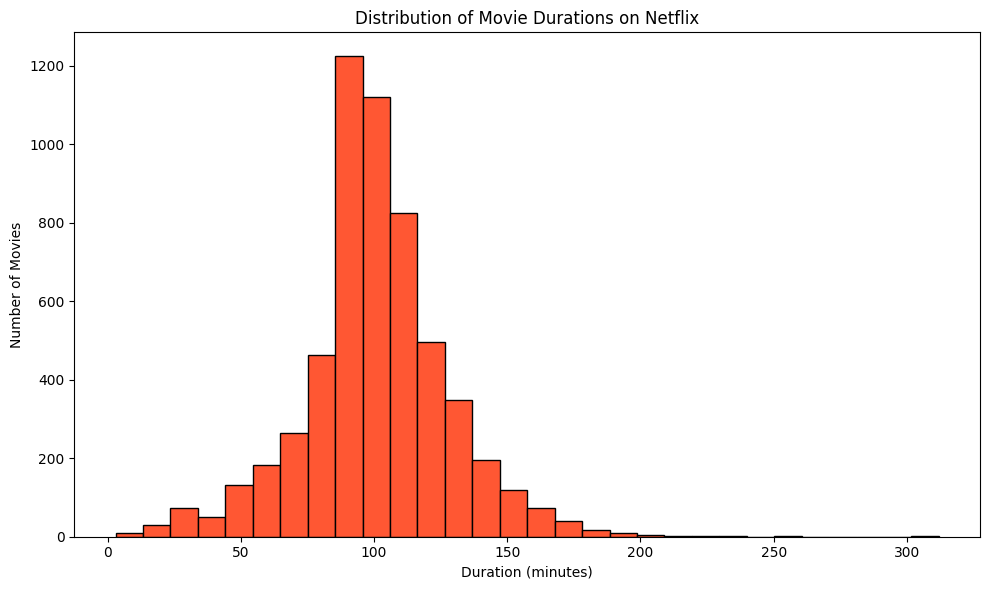

In [34]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10,6))
plt.hist(movie_df['duration'], bins=30, color='#FF5733', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_durations.png')
plt.show()


## 📈 Titles Released Per Year

The scatter plot below illustrates the number of Netflix titles released each year. This visualization helps identify trends in content production and highlights years with significant increases or decreases in the number of releases.
```


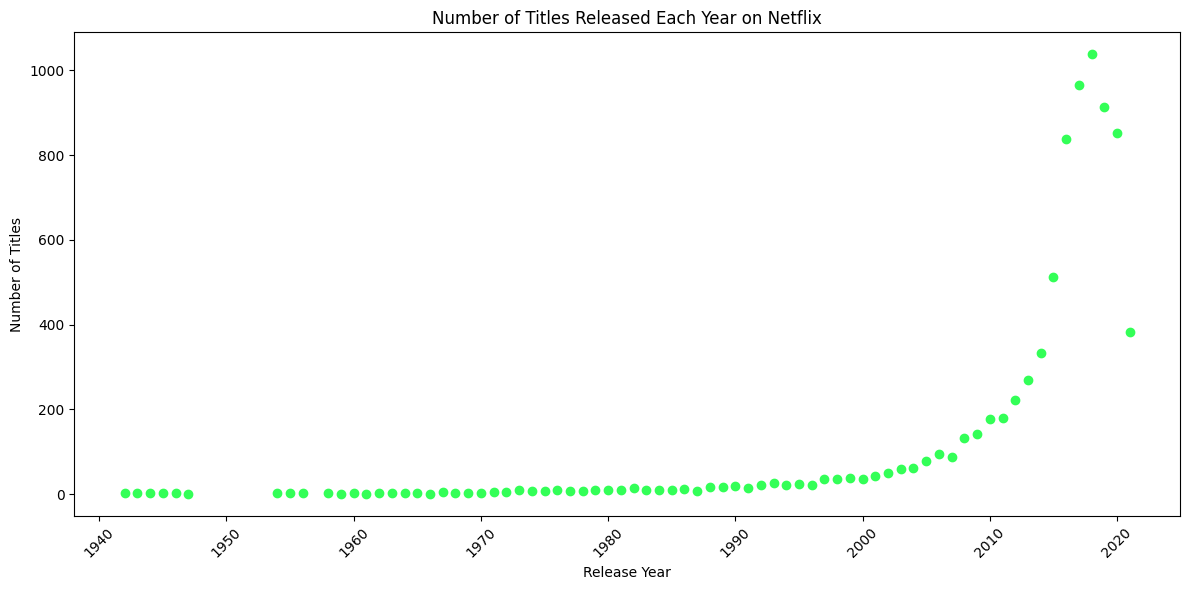

In [35]:
release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.scatter(release_year_counts.index, release_year_counts.values, color='#33FF57')
plt.title('Number of Titles Released Each Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('titles_per_year.png')
plt.show()

## 🎞️ Movies vs TV Shows Released Per Year

The plots below show the trends in the number of Movies and TV Shows released on Netflix each year. By visualizing these trends separately, we can observe how the production and addition of Movies and TV Shows have evolved over time on the platform. This helps identify periods of growth or decline for each content type.

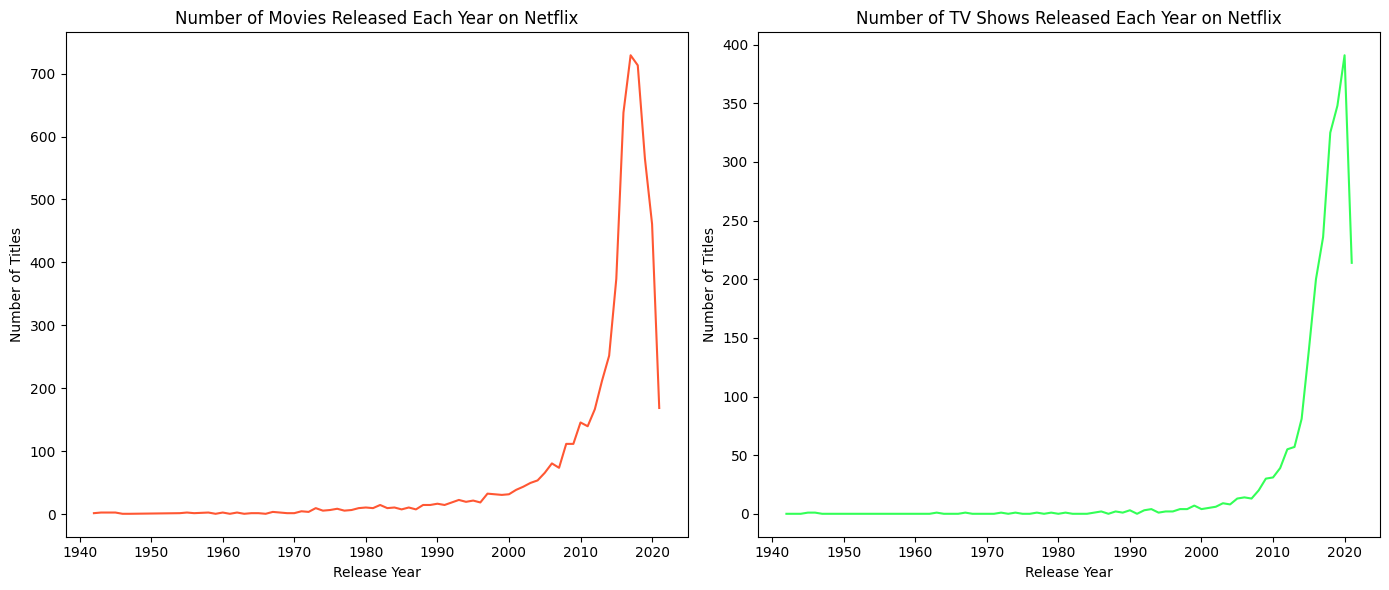

In [36]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='#FF5733')
ax[0].set_title('Number of Movies Released Each Year on Netflix')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Titles')

# Plot TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='#33FF57')
ax[1].set_title('Number of TV Shows Released Each Year on Netflix')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Number of Titles')

plt.tight_layout()
plt.savefig('movies_vs_tvshows_per_year.png')
plt.show()
